## Importing Libraries

In [1]:
%pip install -q seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Loading Data

In [3]:
data = pd.read_csv("Gold Price.csv")
data.head()

,Name,US dollar,Euro,Japanese yen,Pound Sterling,Canadian dollar,Swiss franc,Indian rupee,Chinese renmimbi,Turkish lira,Saudi riyal,Indonesian rupiah,UAE dirham,Thai baht,Vietnamese dong,Egyptian pound,Korean won,Russian ruble,South African rand,Australian dollar
0,12/29/1978,226.00,137.10,NaN,110.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/1/1979,226.00,137.10,NaN,110.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2/1/1979,226.80,137.30,"43,164.90",111.50,263.70,359.60,"1,792.90",NaN,NaN,735.60,"138,160.50",851.30,"4,454.60",NaN,NaN,"107,470.00",NaN,194.60,193.60
3,3/1/1979,218.60,134.00,"43,717.90",108.00,264.40,365.90,"1,802.20",NaN,NaN,739.40,"138,877.00",855.70,"4,477.70",NaN,NaN,"108,027.40",NaN,192.20,193.00
4,4/1/1979,223.20,136.80,"43,674.90",110.70,264.10,366.40,"1,811.70",NaN,NaN,743.40,"139,616.30",860.30,"4,501.50",NaN,NaN,"108,602.50",NaN,193.00,194.60


In [4]:
data.shape

(11677, 20)

## Null Data

In [5]:
nulldata = data.isnull().sum()
nulldata[nulldata>0]

Japanese yen             2
Canadian dollar          2
Swiss franc              2
Indian rupee             2
Chinese renmimbi      1571
Turkish lira          1045
Saudi riyal              2
Indonesian rupiah        2
UAE dirham               2
Thai baht                2
Vietnamese dong       2851
Egyptian pound        2591
Korean won               2
Russian ruble         3661
South African rand       2
Australian dollar        2
dtype: int64

In [6]:
data = data.rename(columns = {"Name":"Date"})
data = data.dropna()
data.head()

,Date,US dollar,Euro,Japanese yen,Pound Sterling,Canadian dollar,Swiss franc,Indian rupee,Chinese renmimbi,Turkish lira,Saudi riyal,Indonesian rupiah,UAE dirham,Thai baht,Vietnamese dong,Egyptian pound,Korean won,Russian ruble,South African rand,Australian dollar
3661,11/1/1993,328.40,264.60,"41,063.30",211.40,419.30,489.40,"9,447.20","1,864.20",2.90,"1,232.90","678,984.20","1,207.40","8,322.60","3,501,319.60","1,072.20","258,497.60",132.70,"1,012.60",488.90
3662,12/1/1993,329.20,266.10,"41,256.90",213.80,420.20,493.30,"9,526.50","1,885.10",2.90,"1,238.90","686,604.20","1,214.10","8,413.80","3,540,613.90","1,099.50","262,333.90",134.20,"1,011.70",488.40
3663,1/13/1993,327.60,265.20,"41,276.20",212.80,420.40,488.80,"9,478.60","1,876.30",2.90,"1,233.30","679,859.60","1,207.90","8,378.60","3,524,014.10","1,093.50","259,550.80",133.60,"1,011.30",487.70
3664,1/14/1993,327.70,263.40,"41,182.70",213.10,418.70,485.40,"9,477.90","1,879.30",2.90,"1,232.10","683,512.40","1,206.60","8,417.70","3,529,676.20","1,093.00","261,507.50",133.80,"1,009.20",490.50
3665,1/15/1993,327.70,265.10,"41,337.30",214.20,419.80,490.50,"9,507.60","1,888.80",2.90,"1,233.30","682,063.70","1,207.80","8,383.10","3,547,517.40","1,093.40","260,896.30",134.50,"1,010.70",488.00


## Datetime Extraction

In [7]:
data['Date'] = pd.to_datetime(data['Date'],format = "%m/%d/%Y")
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data.tail()

,Date,US dollar,Euro,Japanese yen,Pound Sterling,Canadian dollar,Swiss franc,Indian rupee,Chinese renmimbi,Turkish lira,...,Thai baht,Vietnamese dong,Egyptian pound,Korean won,Russian ruble,South African rand,Australian dollar,Year,Month,Day
11672,2023-09-26,"1,907.10","1,804.40","284,017.00","1,566.90","2,576.60","1,744.20","158,862.00","13,942.80","51,982.20",...,"69,510.10","46,499,600.20","58,977.40","2,579,914.50","185,121.50","36,346.70","2,977.00",2023,9,26
11673,2023-09-27,"1,887.30","1,796.90","282,377.80","1,556.50","2,551.10","1,737.30","157,100.00","13,793.00","51,542.00",...,"69,262.00","46,040,683.50","58,307.00","2,562,934.50","182,828.00","36,254.50","2,969.80",2023,9,27
11674,2023-09-28,"1,873.60","1,774.50","279,702.30","1,535.70","2,526.50","1,716.90","155,765.10","13,673.20","51,373.50",...,"68,527.00","45,714,620.00","57,886.70","2,530,660.20","181,380.10","35,614.90","2,916.90",2023,9,28
11675,2023-09-29,"1,870.50","1,768.30","279,471.40","1,532.40","2,533.60","1,710.60","155,445.80","13,650.90","51,294.90",...,"68,407.90","45,518,617.50","57,796.00","2,523,098.80","180,724.30","35,342.20","2,904.10",2023,9,29
11676,2023-02-10,"1,870.50","1,768.30","279,471.40","1,532.40","2,533.60","1,710.60","155,445.80","13,650.90","51,294.90",...,"68,407.90","45,518,617.50","57,796.00","2,523,098.80","180,724.30","35,342.20","2,904.10",2023,2,10


## Separating the data of 10 years from now 

In [8]:
data10 = data[(data['Year']>2013)]
data10.shape

(2544, 23)

In [9]:
columns_to_convert = data10.columns[1:20]
data10[columns_to_convert] = data10[columns_to_convert].apply(lambda series: series.str.replace(',', '').astype(float))
data10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2544 entries, 9133 to 11676
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                2544 non-null   datetime64[ns]
 1   US dollar           2544 non-null   float64       
 2   Euro                2544 non-null   float64       
 3   Japanese yen        2544 non-null   float64       
 4   Pound Sterling      2544 non-null   float64       
 5   Canadian dollar     2544 non-null   float64       
 6   Swiss franc         2544 non-null   float64       
 7   Indian rupee        2544 non-null   float64       
 8   Chinese renmimbi    2544 non-null   float64       
 9   Turkish lira        2544 non-null   float64       
 10  Saudi riyal         2544 non-null   float64       
 11  Indonesian rupiah   2544 non-null   float64       
 12  UAE dirham          2544 non-null   float64       
 13  Thai baht           2544 non-null   float64      

In [10]:
dataUAE = data10[['Date','Year','Month','Day','UAE dirham']]
dataUAE.shape

(2544, 5)

In [11]:
dataUAE.head()

,Date,Year,Month,Day,UAE dirham
9133,2014-01-01,2014,1,1,4424.1
9134,2014-02-01,2014,2,1,4499.4
9135,2014-03-01,2014,3,1,4534.3
9136,2014-06-01,2014,6,1,4577.5
9137,2014-07-01,2014,7,1,4508.6


In [12]:
dataUAE.isnull().sum()

Date          0
Year          0
Month         0
Day           0
UAE dirham    0
dtype: int64

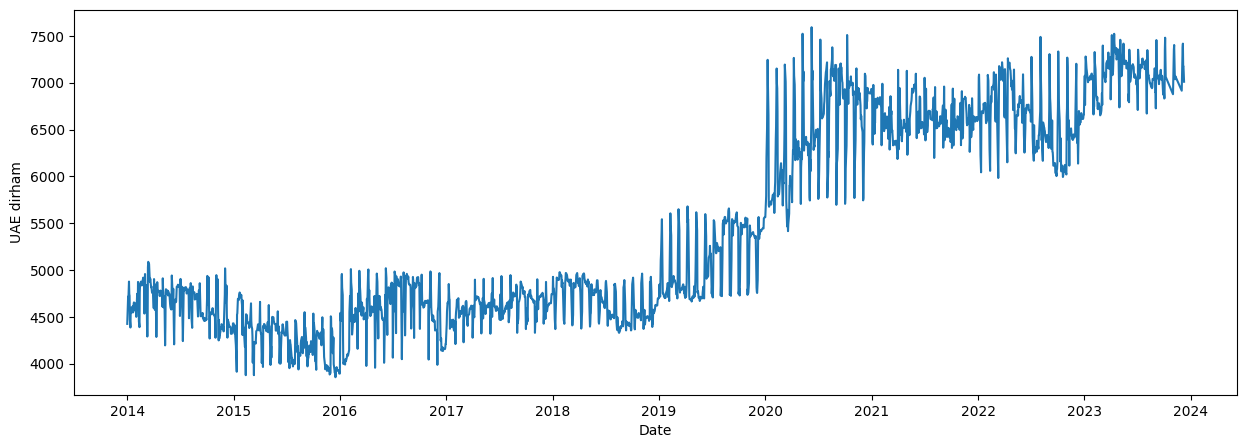

In [13]:
plt.subplots(figsize = (15,5))
sns.lineplot(dataUAE,x = dataUAE['Date'], y = dataUAE['UAE dirham'])
plt.show()

In [14]:
years = list(dataUAE['Year'].value_counts().index.sort_values())
years

[2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

## Helper function for collecting and plotting data of each year after separation

In [15]:
def Yearly_data(year):
    grp = dataUAE[(dataUAE.Year == year)]
    plt.subplots(figsize = (20,5))
    sns.lineplot(grp,x = grp.Month, y = grp['UAE dirham'])
    plt.title(f'Year {year}')
    plt.show()
    

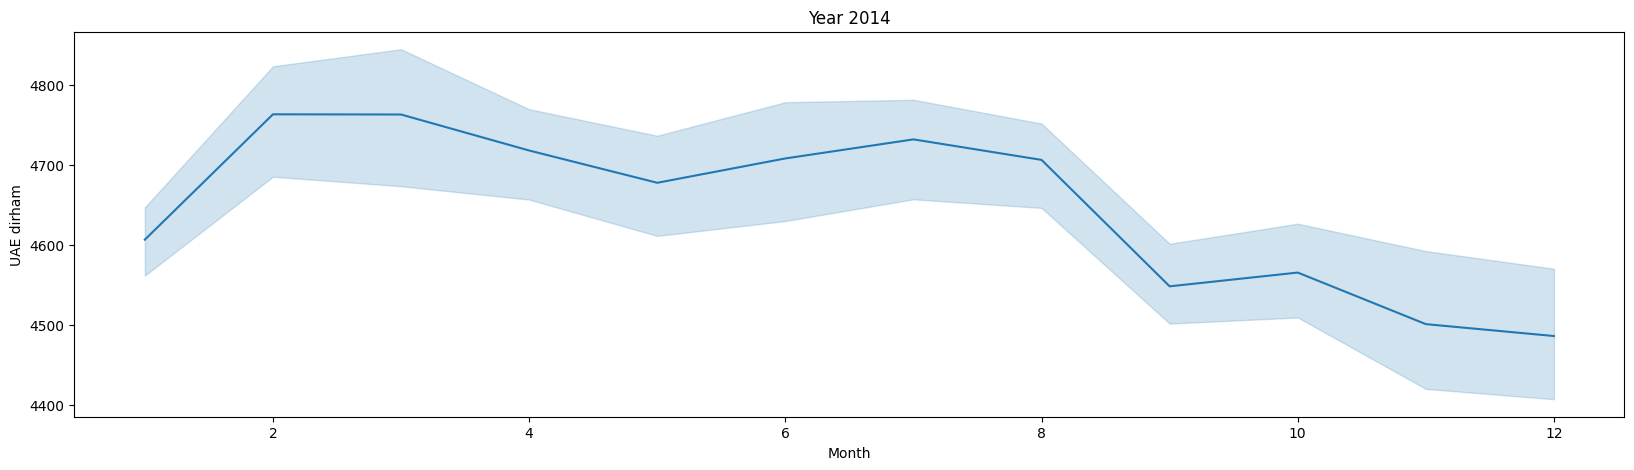

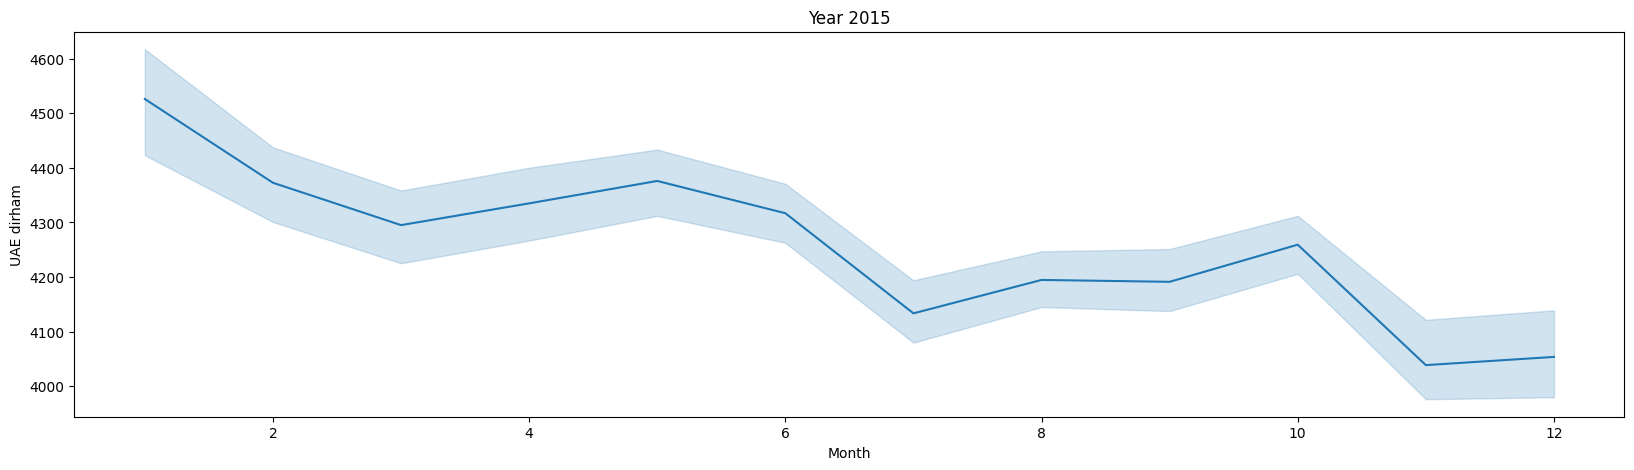

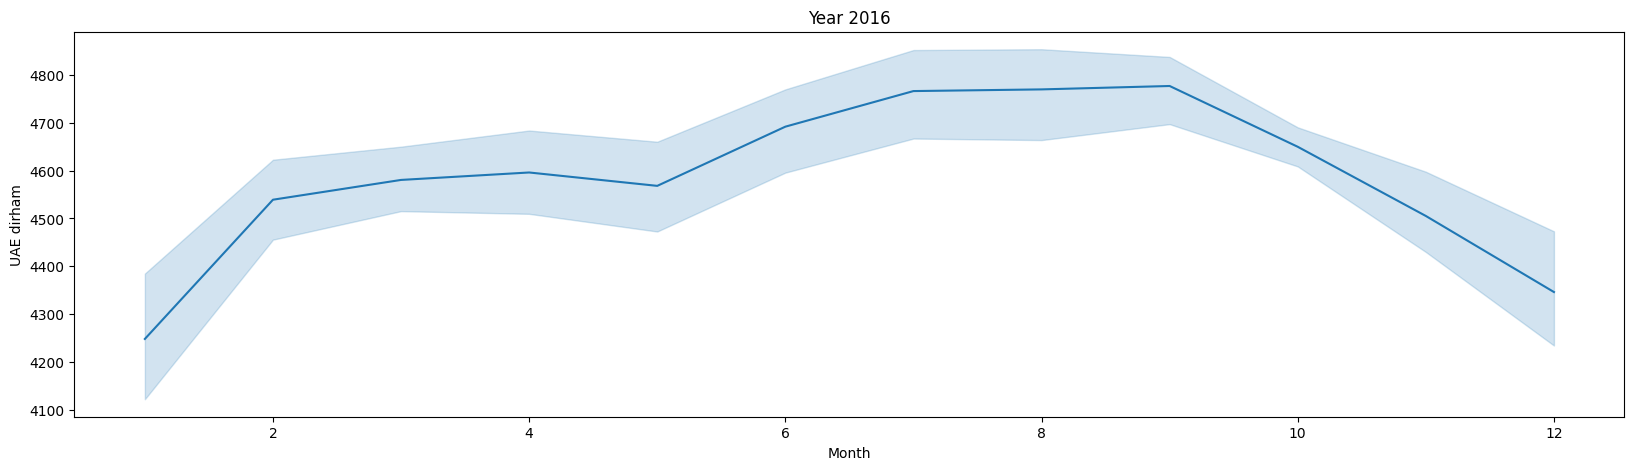

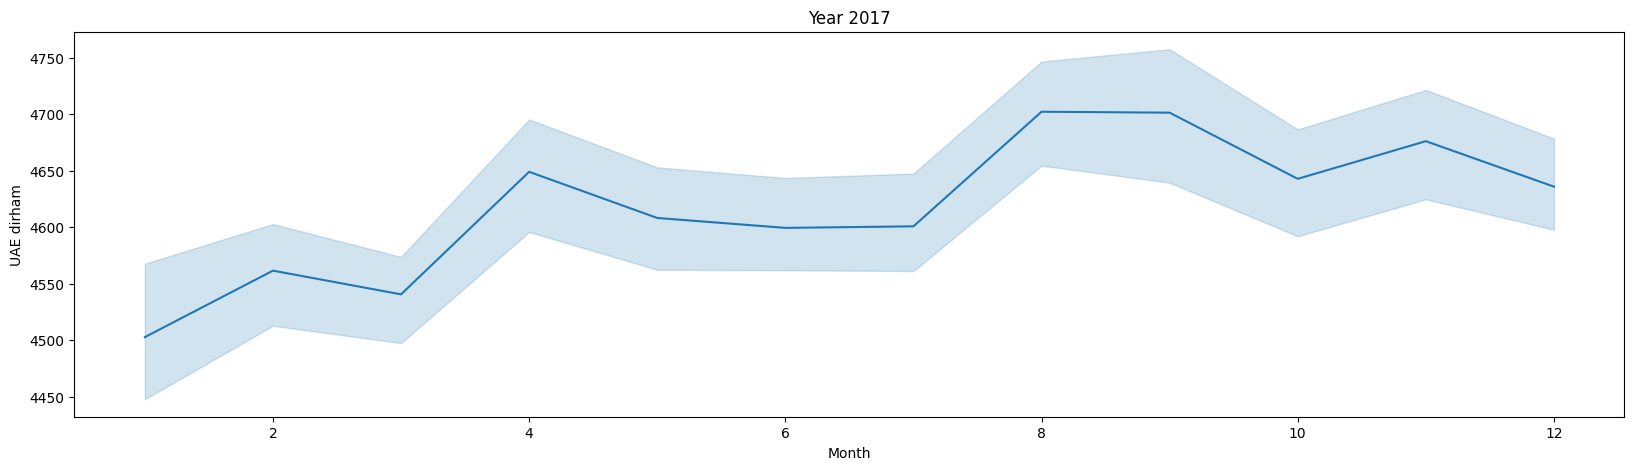

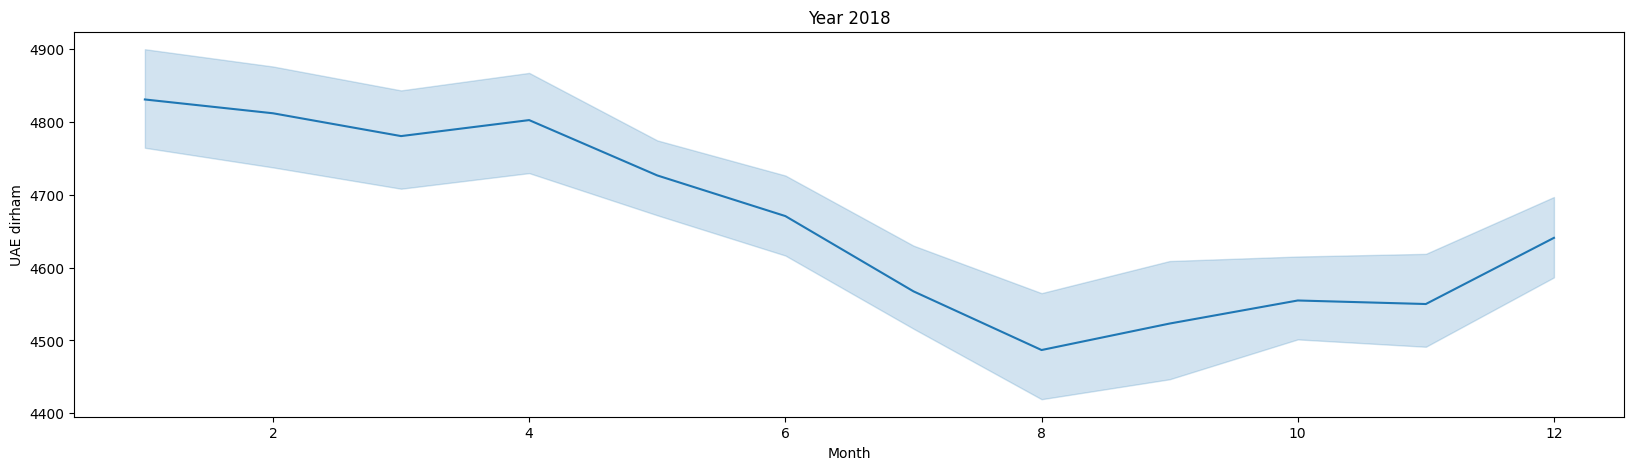

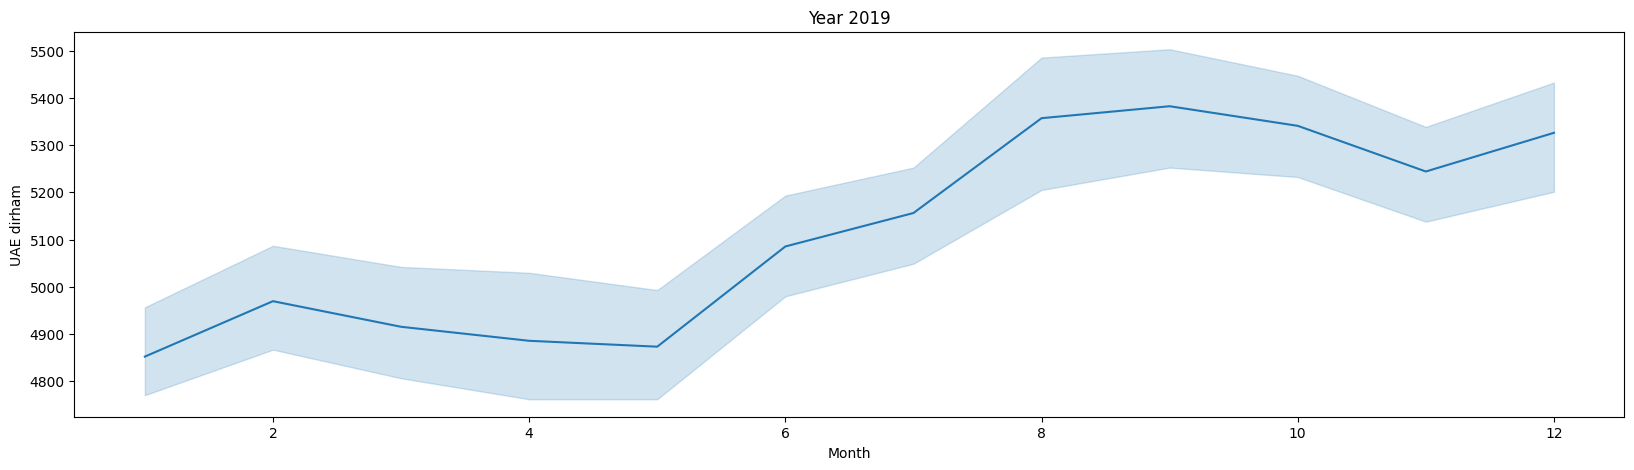

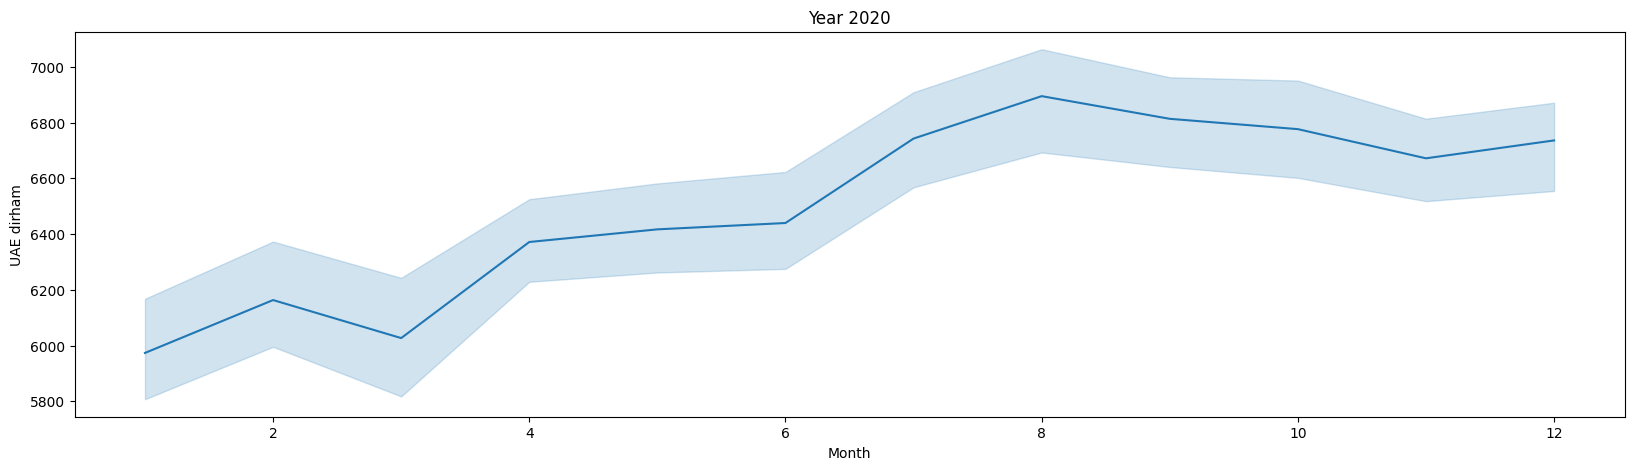

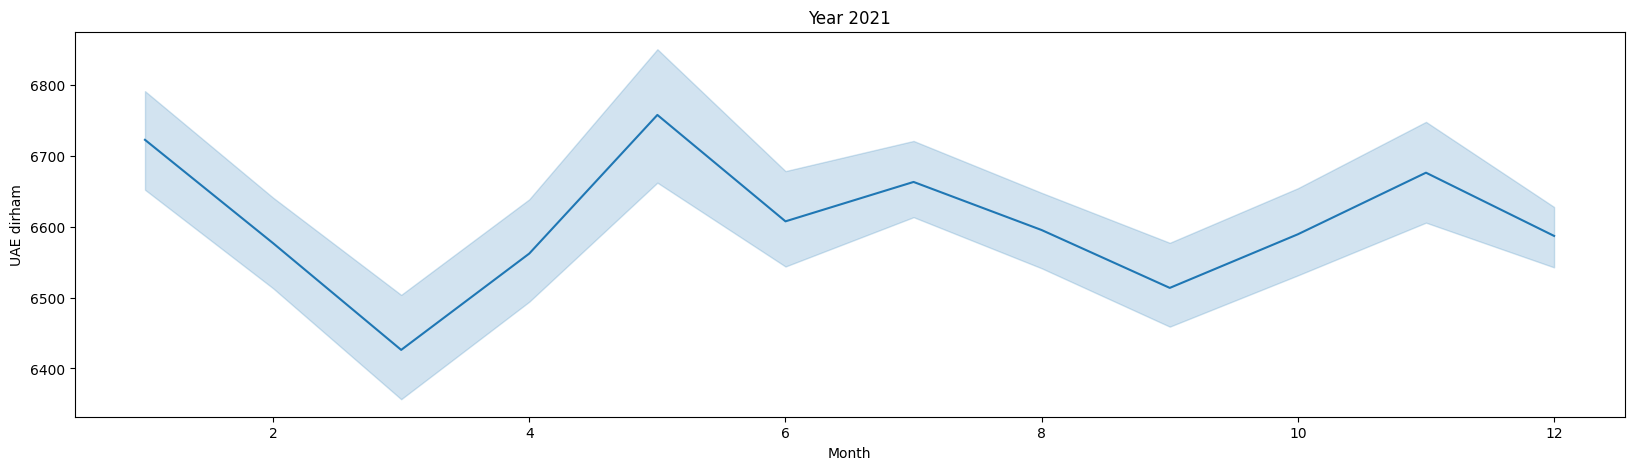

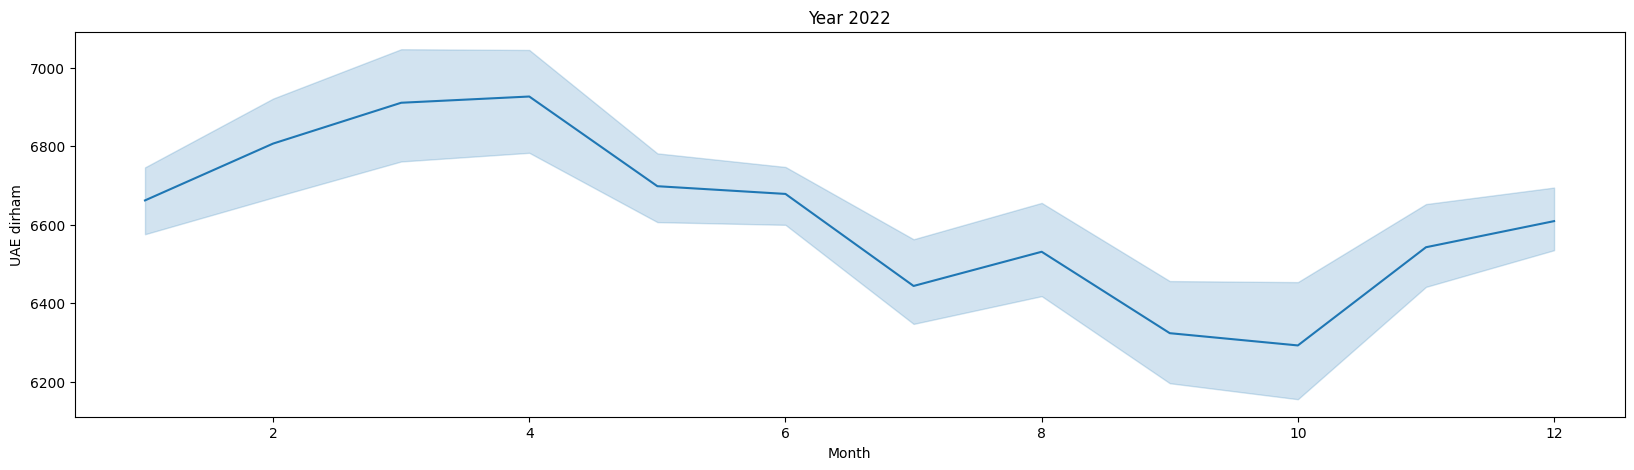

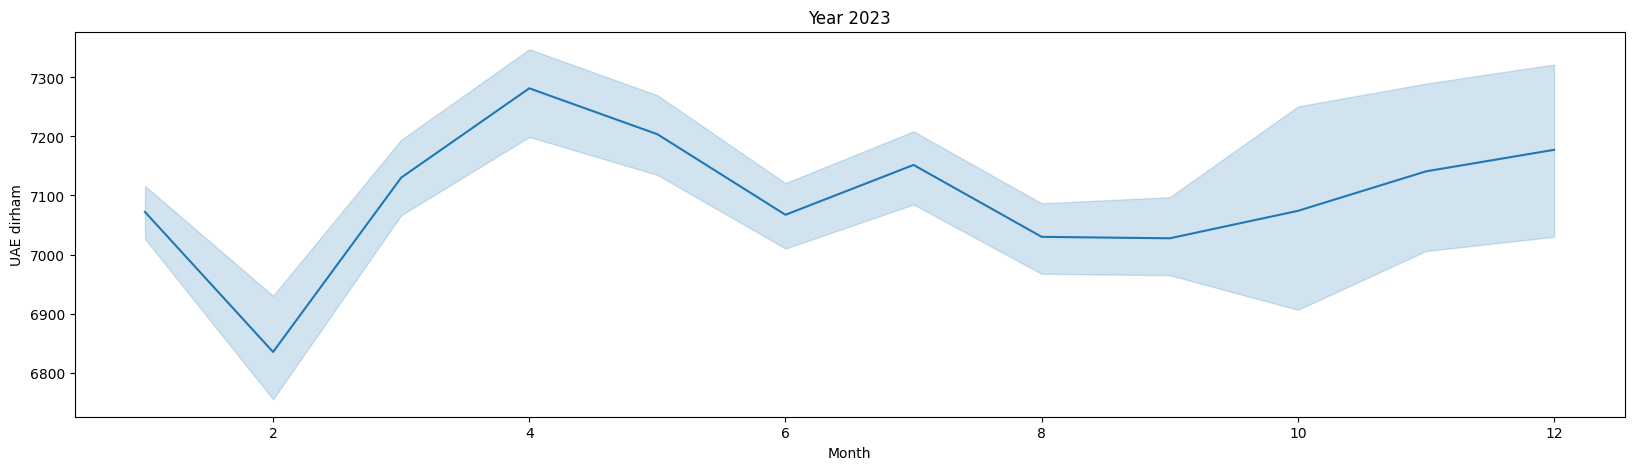

In [16]:
for i in range(len(years)):
    Yearly_data(years[i])

In [17]:
dataUAE.head()

,Date,Year,Month,Day,UAE dirham
9133,2014-01-01,2014,1,1,4424.1
9134,2014-02-01,2014,2,1,4499.4
9135,2014-03-01,2014,3,1,4534.3
9136,2014-06-01,2014,6,1,4577.5
9137,2014-07-01,2014,7,1,4508.6


## Let's Try Prophet

In [18]:
from sklearn.model_selection import train_test_split
x = dataUAE[['Year','Month','Day']]
y = dataUAE[['UAE dirham']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 99)

## Importing model

In [19]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

## Helper function for model evaluation

In [21]:
def evaluation_metrics(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test,y_pred)
    r2score = r2_score(y_test,y_pred)
    trainscore = model.score(x_train,y_train)
    
    print(f'Mean Squared Error = {mse}')
    print(f'Mean Absolute Error = {mae}')
    print(f'Root Mean Squared Error = {rmse}')
    print(f'r2 score = {r2score}')
    
    Comparison = x_test.copy("deep")
    Comparison['Actual Price'] = y_test
    Comparison['Predicted Price'] = y_pred
    
    sns.lineplot(Comparison, x = 'Year',y = 'Actual Price')
    sns.lineplot(Comparison, x = 'Year',y = 'Predicted Price')
    plt.legend(['Actual Price','','Predicted Price'])
    plt.show()
    
    return {'Training Score': trainscore,
           'Testing Score': r2score}

In [22]:
results = {}

## Random Forest Regressor

Mean Squared Error = 5698.1165793398895
Mean Absolute Error = 49.45902161100217
Root Mean Squared Error = 75.48587006413776
r2 score = 0.9948900765684061


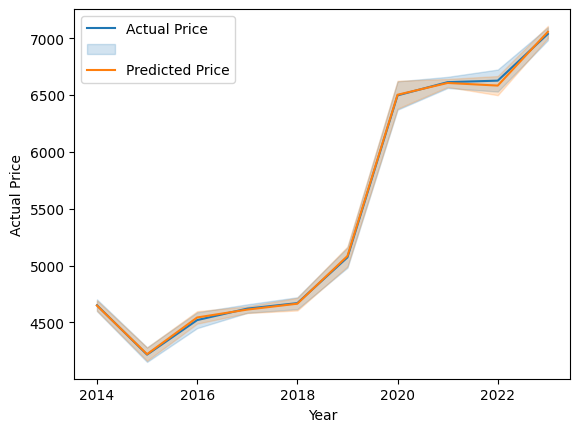

In [23]:
results['Random Forest Regressor'] = evaluation_metrics(rfr)

## Checking Overfitting

In [24]:
resultsdf = pd.DataFrame(results)
resultsdf

,Random Forest Regressor
Testing Score,0.994890
Training Score,0.999241


In [25]:
%pip install -q prophet

Note: you may need to restart the kernel to use updated packages.


## Making time dataframe for Prophet

In [26]:
time_data = dataUAE[['Date','UAE dirham']]
time_data.columns = ['ds','y']
time_data.head()

,ds,y
9133,2014-01-01,4424.1
9134,2014-02-01,4499.4
9135,2014-03-01,4534.3
9136,2014-06-01,4577.5
9137,2014-07-01,4508.6


In [27]:
from prophet import Prophet
m = Prophet(daily_seasonality=True)
model_fit = m.fit(time_data)

Importing plotly failed. Interactive plots will not work.


14:28:50 - cmdstanpy - INFO - Chain [1] start processing
14:28:51 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
forecast = model_fit.predict(time_data)
forecast[['ds','yhat','yhat_upper','yhat_lower']].tail()

,ds,yhat,yhat_upper,yhat_lower
2539,2023-12-04,6947.235733,7266.820524,6602.726369
2540,2023-12-05,6947.409384,7269.232310,6633.745630
2541,2023-12-06,6936.462565,7264.880739,6606.514530
2542,2023-12-07,6951.426741,7297.824993,6596.376379
2543,2023-12-09,6929.715042,7251.298169,6602.404813


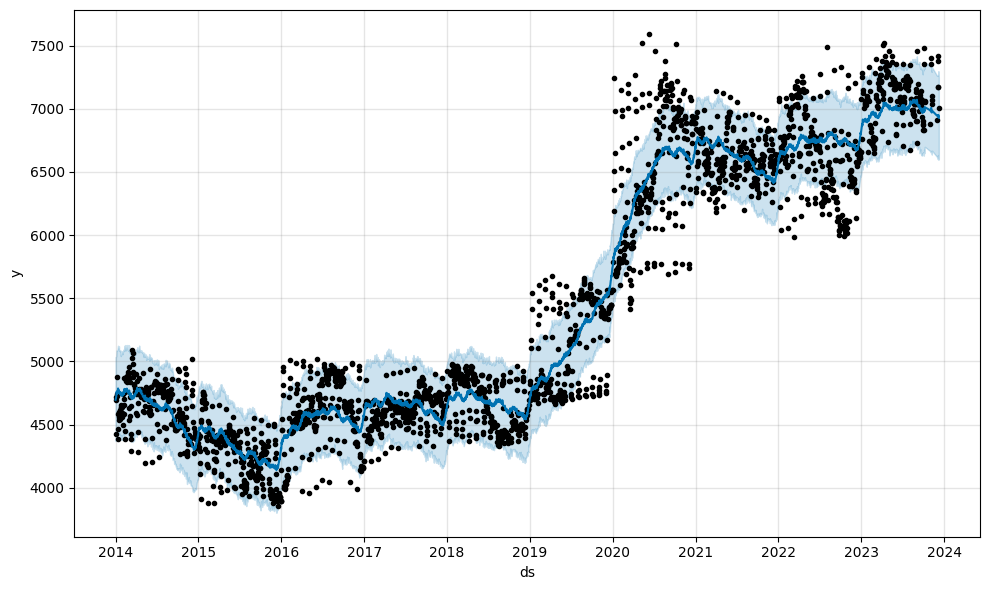

In [29]:
model_fit.plot(forecast);

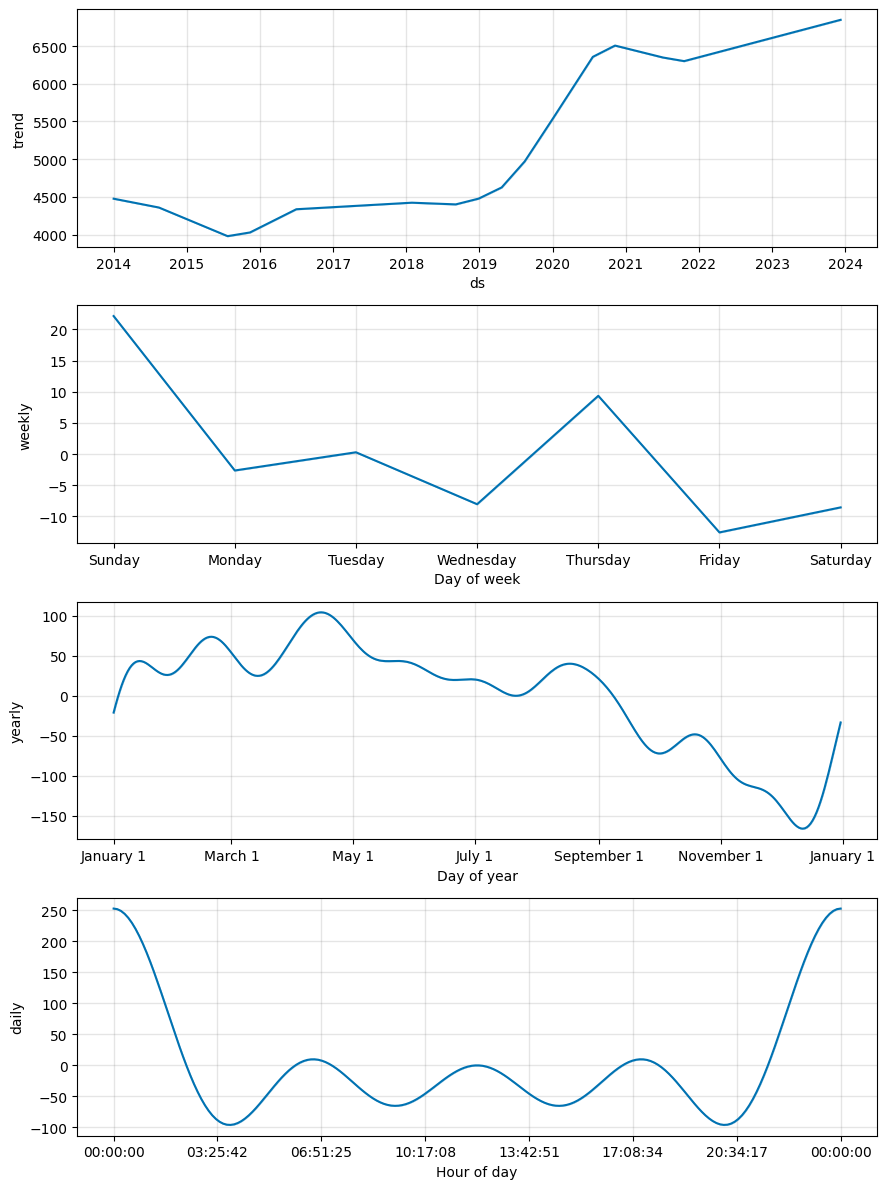

In [30]:
model_fit.plot_components(forecast);

## Forecasting for next 6 months

In [31]:
m2 = Prophet(daily_seasonality=True)
m2.fit(time_data)
future = m2.make_future_dataframe(periods = 336)
future.tail(10)

14:28:54 - cmdstanpy - INFO - Chain [1] start processing


14:28:55 - cmdstanpy - INFO - Chain [1] done processing


,ds
2870,2024-10-31
2871,2024-11-01
2872,2024-11-02
2873,2024-11-03
2874,2024-11-04
2875,2024-11-05
2876,2024-11-06
2877,2024-11-07
2878,2024-11-08
2879,2024-11-09


In [32]:
forecast2 = m2.predict(future)
forecast2[['ds','yhat','yhat_upper','yhat_lower']].tail()

,ds,yhat,yhat_upper,yhat_lower
2875,2024-11-05,7239.756753,7641.986803,6805.140603
2876,2024-11-06,7229.087839,7679.790513,6768.783455
2877,2024-11-07,7244.366760,7669.663113,6766.261859
2878,2024-11-08,7220.643854,7648.918926,6793.872780
2879,2024-11-09,7223.108230,7667.637039,6781.014469


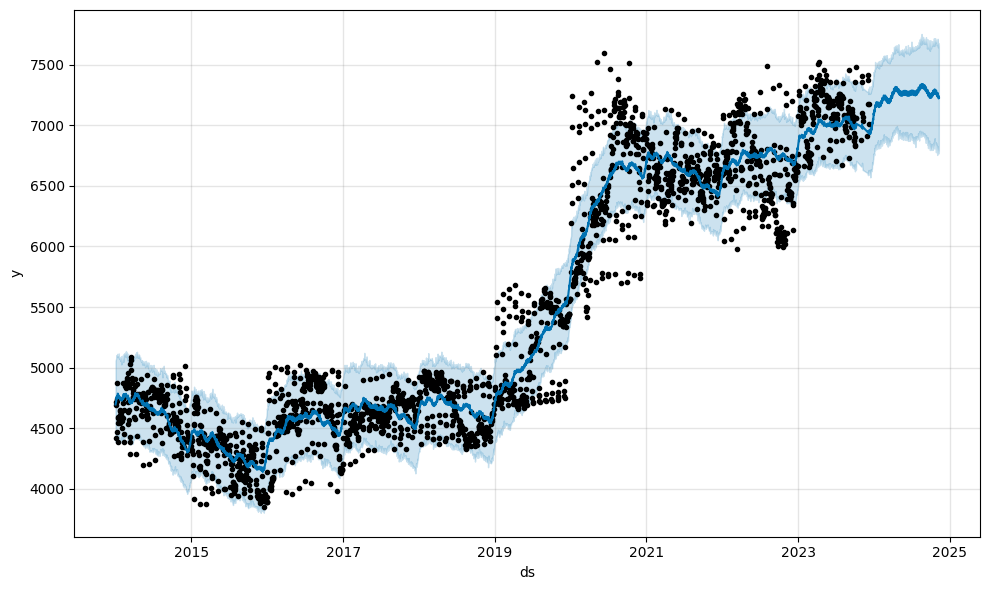

In [33]:
m2.plot(forecast2);

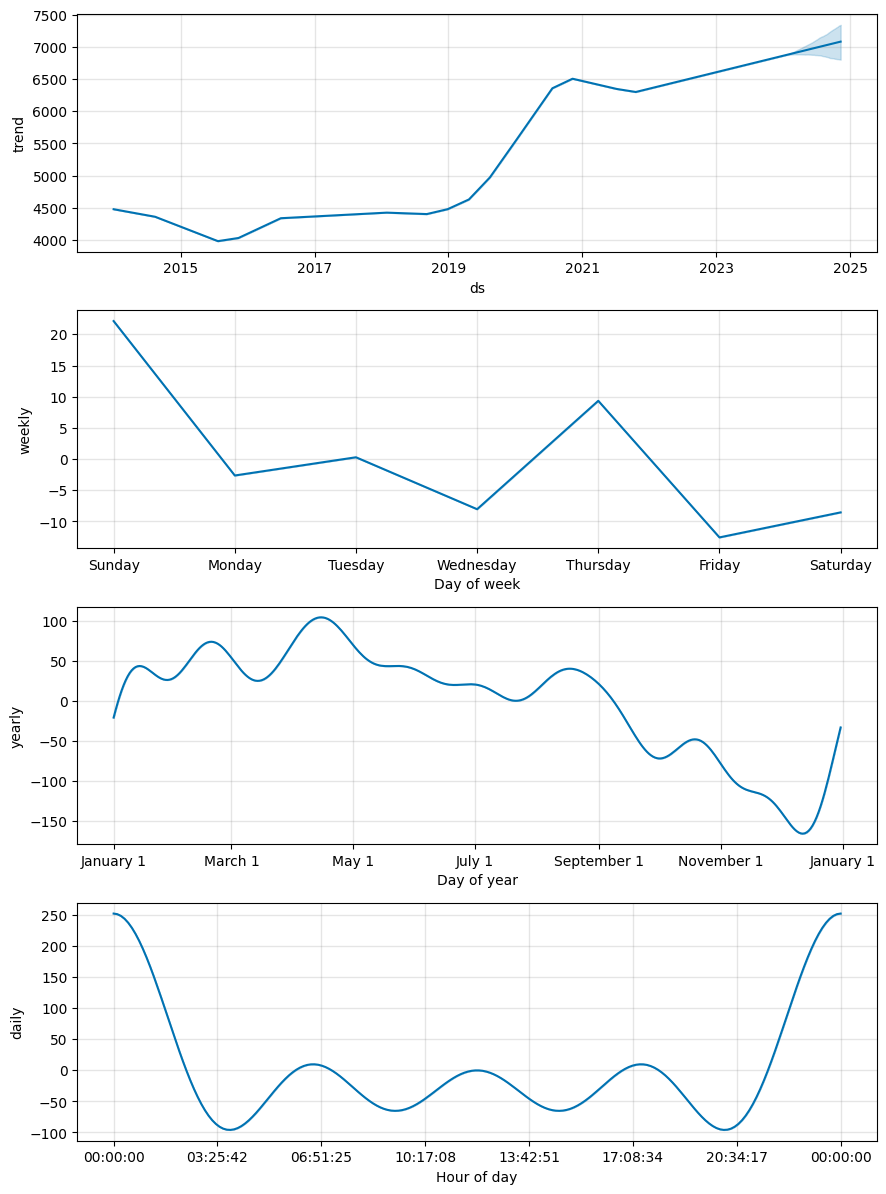

In [34]:
m2.plot_components(forecast2);

In [35]:
predictions = forecast2[['ds','yhat']]
predictions = predictions.rename(columns = {'ds':'Date','yhat':'UAE dirham'})
predictions.head()

,Date,UAE dirham
0,2014-01-01,4696.585304
1,2014-01-04,4721.355876
2,2014-01-05,4759.154900
3,2014-01-07,4749.246612
4,2014-01-08,4745.645503


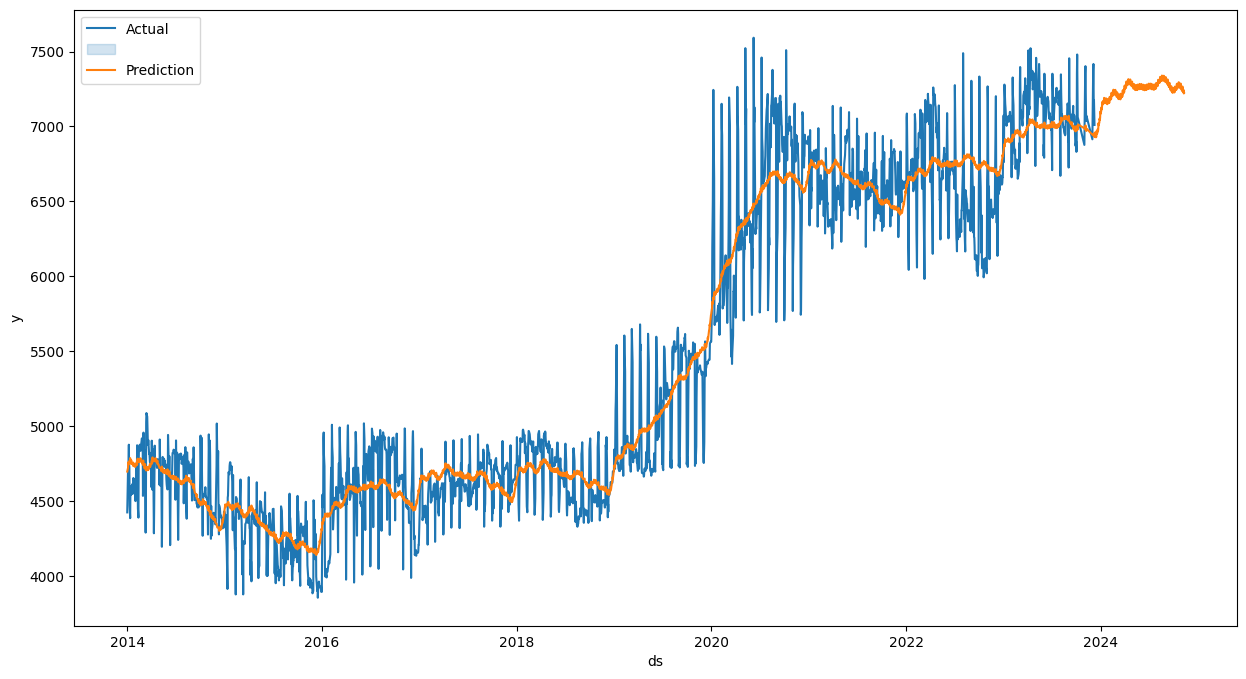

In [36]:
plt.subplots(figsize = (15,8))
sns.lineplot(time_data,x = 'ds',y='y',legend='full')
sns.lineplot(predictions,x = 'Date',y = 'UAE dirham',legend='full')
plt.legend(labels = ['Actual','','Prediction'])
plt.show()

In [37]:
predictions['Date'] = pd.to_datetime(predictions['Date'])
predictions['Year'] = predictions['Date'].dt.year
predictions['Month'] = predictions['Date'].dt.month
predictions['Day'] = predictions['Date'].dt.day

## Model Evaluation

In [38]:
x_time  = predictions.drop(columns=['Date','UAE dirham'])
y_time = predictions[['UAE dirham']]

In [39]:
x_time_train,x_time_test,y_time_train,y_time_test = train_test_split(x_time,y_time,test_size=0.2,random_state=99)

In [40]:
rfr_time_model = RandomForestRegressor()
rfr_time_model.fit(x_time_train,y_time_train)
rfr_time_pred = rfr_time_model.predict(x_time_test)

Mean Squared Error = 5754.389630078574
Mean Absolute Error = 49.49706090373292
Root Mean Squared Error = 75.85769328208296
r2 score = 0.9948396123533391


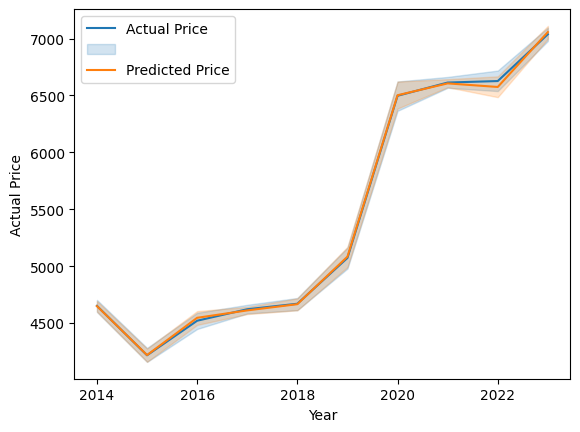

In [41]:
results['Random Forest Evaluation Regressor'] = evaluation_metrics(rfr_time_model)

## Comparing accuracy of predicted model and forecasted model

In [42]:
CompareRFR = pd.DataFrame(results)
CompareRFR

,Random Forest Regressor,Random Forest Evaluation Regressor
Training Score,0.999241,0.999263
Testing Score,0.994890,0.994840


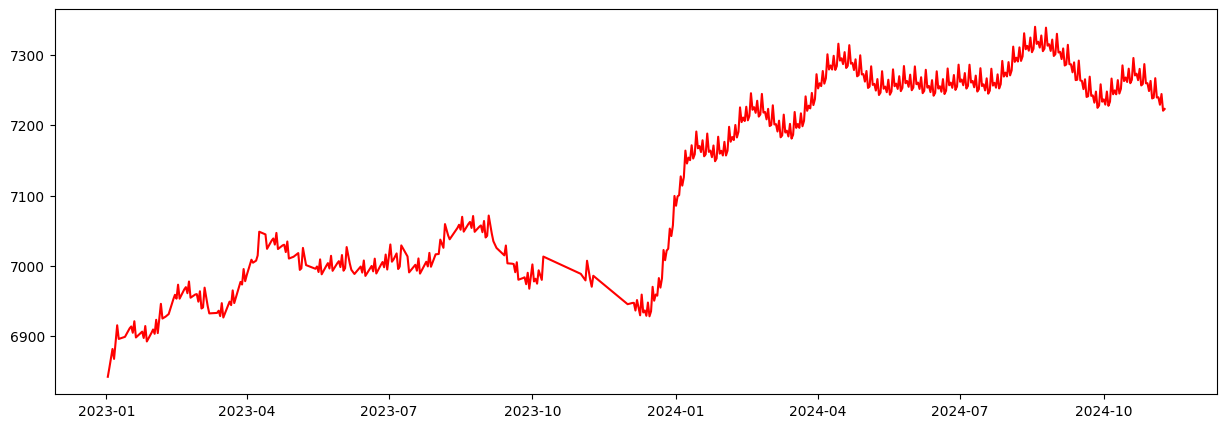

In [43]:
analysis = predictions[predictions['Year']>2022]

plt.subplots(figsize = (15,5))
plt.plot(analysis['Date'],analysis['UAE dirham'],color = 'red')
plt.show()